<a href="https://colab.research.google.com/github/Maksim2809/Old_HomeWork_Numerical_Methods/blob/main/%D0%A7%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%B4%D0%B8%D1%84%D1%83%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(x, y): return 0.6*math.sin(x) + 1.25*y**2 + 1
#def y2(x): return (-0.6*math.cos(x) + x + 0.6)+1/3*x**3 + 0.6*x**2 + 0.54*x + (-1.2*x - 0.72)*math.sin(x) + 0.09*math.sin(2*x) - 1.2*math.cos(x) + 1.2

def cnk(n,k):
    return math.factorial(n)/(math.factorial(n-k)*math.factorial(k))

def step(n = 7):
    arr = [0.0]
    for i in range(1,n+1):
        if i%4 == 0:
            arr.append(-0.6 + 1.25*sum([cnk(i-1,j)*arr[j]*arr[i-1-j] for j in range(i)]))
        if i%4 == 1:
            arr.append(0 + 1 + 1.25*sum([cnk(i-1,j)*arr[j]*arr[i-1-j] for j in range(i)]))
        if i%4 == 2:
            arr.append(0.6 + 1.25*sum([cnk(i-1,j)*arr[j]*arr[i-1-j] for j in range(i)]))
        if i%4 == 3:
            arr.append(0 + 1.25*sum([cnk(i-1,j)*arr[j]*arr[i-1-j] for j in range(i)]))
    return arr

def step_ryad(X, coef):
    """
    Метод степенных рядов
    """
    return [sum([(coef[i]*x**i)/math.factorial(i)   for i in range(len(coef))]) for x in X]

def itr(yk,x,h,n=3):
    """
    Метод простых итераций
    """
    yn = y0
    for i in range(n):
        yn = yk + h*f(x,yn)
    return yn

def Eiler_yav(x0,y0,h,n):
    """
    Явный метод Эйлера
    """
    arr = []
    for i in range(n+1):
        if i == 0:
            arr.append(y0)
        else:
            yn = arr[i-1] + h*f(x0 + i*h, arr[i-1])
            arr.append(yn)
    return arr

def Eiler_neyav(x0,y0,h,n):
    """
    Неявный метод Эйлера
    """
    arr = []
    zn = []
    for i in range(n+1):
        if i == 0:
            arr.append(y0)
        else:
            zn = itr(arr[i-1],x0 + (i+1)*h,h,n = 2)
            arr.append(arr[i-1] + h*f(x0 + (i+1)*h,zn ))
    return arr

def Runge_Kut(x0,y0,a,h,n):
    """
    Метод Рунге-Кутта
    """
    arr = [y0]
    yn = y0
    for i in range(1,n+1):
        a0 = a
        a1 = (1-a)
        xi = x0 + i*h
        yn = yn + h*(
            a0*f(xi,yn) +
            a1*f(xi + h/(2*a1), yn + h/(2*a1)*f(xi,yn))
            )
        arr.append(yn)
    return arr

def intrAdams(x0,y0,h,n):
    """
    Интерполяционный метод Адамса
    """
    arr = [y0]
    yn = y0
    for i in range(n):
        xi = x0 + i*h
        xi1 = x0 + (i+1)*h
        yn1 = res_runge[i+1]
        yn = yn + h/2*(f(xi,yn) + f(xi1,yn1))
        arr.append(yn)
    return arr

def extrAdams(x0,y0,h,n):
    """
    Экстрополяционный метод Адамса
    """
    arr = [y0, res_runge[1]]
    yn = arr[1]
    for i in range(2,n+1):
        xi = x0 + i*h
        xi1 = x0 + (i-1)*h
        yn1 = arr[i-1]
        yn = yn + h/2*(3*f(xi,yn) - f(xi1,yn1))
        arr.append(yn)
    return arr

In [20]:
k = 10
A0 = 1/(k+3)
x0,y0 = 0, 0
a, b = 0, 1
h = 0.01
n = int((b-a)/h)
res_eiler = Eiler_yav(x0,y0,h,n)
res_neyav = Eiler_neyav(x0,y0,h,n)
res_runge = Runge_Kut(x0,y0,A0,h,n)
res_iAdms = intrAdams(x0,y0,h,n)
res_eAdms = extrAdams(x0,y0,h,n)

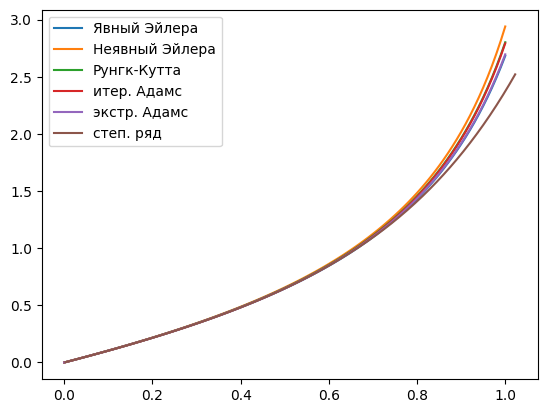

In [31]:
plt.plot([x0 + i*h for i in range(n+1)],res_eiler, label = 'Явный Эйлера')
plt.plot([x0 + i*h for i in range(n+1)],res_neyav, label = 'Неявный Эйлера')
plt.plot([x0 + i*h for i in range(n+1)],res_runge, label = 'Рунгк-Кутта')
plt.plot([x0 + i*h for i in range(n+1)],res_iAdms, label = 'итер. Адамс')
plt.plot([x0 + i*h for i in range(n+1)],res_eAdms, label = 'экстр. Адамс')
plt.plot([0.0025*i for i in range(1,410)], step_ryad([0.0025*i for i in range(1,410)],step()), label = 'степ. ряд')
plt.legend()
plt.show()